# Медианный фильтр

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./lena.png')

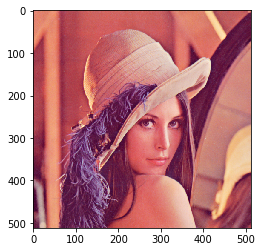

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [4]:
img.shape

(512, 512, 3)

In [835]:
# Вначале попробуем реализовать медианный фильтр для ЧБ изображения
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [899]:
def median_filter_flat(img, ksize): # изображение и размер медианного фильтра (всегда нечетный)
    # создаем массив из nan значений формы исходной картинки + по половине длины стороны фильтра с каждой стороны 
    result = np.full((img.shape[0]+(ksize // 2)*2,img.shape[1]+(ksize // 2)*2), np.nan)
    
    # создаем технический массив из nan значений формы исходной картинки + по половине длины стороны фильтра с каждой стороны 

    img_with_frame_1 = np.full((img.shape[0]+(ksize // 2)*2,img.shape[1]+(ksize // 2)*2), np.nan)
    
    # записываем в него изображение, по краям оставляем nan 

    img_with_frame_1[(ksize // 2):img.shape[0]+(ksize // 2), (ksize // 2):img.shape[1]+(ksize // 2)] = img
    
    # бежим по строкам
    for row in range((ksize // 2), img_with_frame_1.shape[0]):
        
        # бежим по столбцам
        for col in range((ksize // 2), img_with_frame_1.shape[1]):
            try:
                # опредеяем край окна фильтра (правый верхний)
                edge = [row-(ksize // 2) , col-(ksize // 2)]
                # определяем окно фильтра
                window = img_with_frame_1[edge[0] : edge[0]+ksize, edge[1] : edge[1]+ksize]
                # записываем результат
                result[row, col] = int(np.nanmedian(window))

            except:
                continue

    # вырезаем из "обрамленного" рамкой из nan массива массив нужного размера
    result = result[(ksize // 2):-(ksize // 2), (ksize // 2):-(ksize // 2)]

    return result

In [906]:
# протестируем на плоском массиве
img_test = np.array([[3,0,1,5,0,3,0,3],
                    [2,6,2,4,3,0,3,0],
                    [2,4,1,0,6,1,4,1],
                    [3,0,1,5,0,3,0,2],
                    [2,6,2,4,3,2,3,0],
                    [2,4,1,0,6,2,1,1],
                    [2,6,2,4,4,0,3,6],
                    [2,4,1,0,6,1,6,1]])


In [907]:
# похоже на правду
median_filter_flat(img_test, ksize=3)

array([[2., 2., 3., 2., 3., 1., 1., 1.],
       [2., 2., 2., 2., 3., 3., 1., 2.],
       [2., 2., 2., 2., 3., 3., 1., 1.],
       [2., 2., 2., 2., 3., 3., 2., 1.],
       [2., 2., 2., 2., 3., 2., 2., 1.],
       [3., 2., 4., 3., 3., 3., 2., 2.],
       [3., 2., 2., 2., 2., 3., 1., 2.],
       [3., 2., 3., 3., 2., 3., 2., 4.]])

In [900]:
# применим функцию к изображению
res_gray=median_filter_flat(img_gray, 9)
res_gray

array([[162., 162., 162., ..., 168., 169., 170.],
       [162., 162., 162., ..., 164., 168., 162.],
       [162., 162., 162., ..., 164., 155., 155.],
       ...,
       [ 50.,  50.,  50., ...,  94.,  96.,  97.],
       [ 50.,  50.,  50., ...,  96.,  97.,  99.],
       [ 50.,  49.,  50., ...,  97.,  99., 100.]])

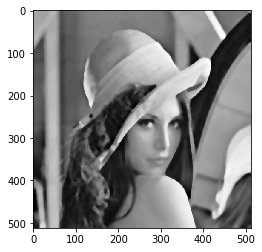

In [901]:
plt.imshow(res_gray, cmap='gray')

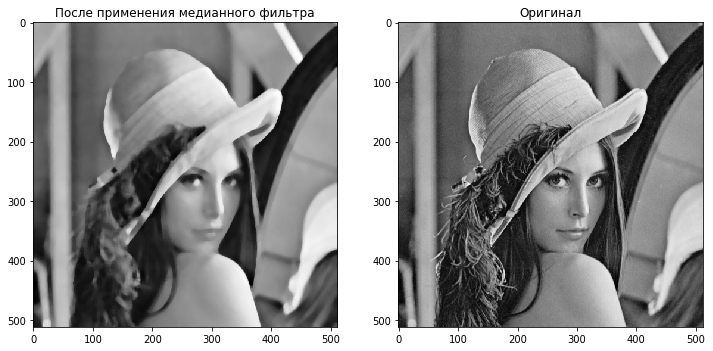

In [902]:
plt.figure(2, figsize=(12, 8))
plt.subplot(121)
plt.imshow(res_gray, cmap='gray')
plt.title('После применения медианного фильтра')
plt.subplot(122)
plt.imshow(img_gray, cmap='gray')
plt.title('Оригинал');

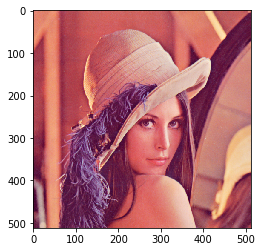

In [839]:
# Теперь попробуем реализовать медианный фильтр для цветного изображения
plt.imshow(img[...,::-1])

In [892]:
def median_filter_color(img, ksize): # изображение и размер медианного фильтра (всегда нечетный)
    result = np.full((img.shape[0]+(ksize // 2)*2,img.shape[1]+(ksize // 2)*2, img.shape[2]), np.nan, dtype=int)
    
    for channel in range(img.shape[-1]):

        img_with_frame_1 = np.full((img.shape[0]+(ksize // 2)*2,img.shape[1]+(ksize // 2)*2), np.nan, dtype=int)
        img_with_frame_1[(ksize // 2):img.shape[0]+(ksize // 2), (ksize // 2):img.shape[1]+(ksize // 2)] = img[..., channel]
        for row in range((ksize // 2), img_with_frame_1.shape[0]-(ksize // 2)):
            for col in range((ksize // 2), img_with_frame_1.shape[1]-(ksize // 2)):
                try:

                    edge = [row-(ksize // 2) , col-(ksize // 2)]
                    window = img_with_frame_1[edge[0] : edge[0]+ksize, edge[1] : edge[1]+ksize]
                    result[row, col, channel] = int(np.nanmedian(window))

                except:
                    continue


    result = result[(ksize // 2):result.shape[0]-1, (ksize // 2):result.shape[1]-1, :]

    return result

In [904]:
res = median_filter_color(img, ksize=3)
res

array([[[125, 137, 226],
        [125, 137, 226],
        [128, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [100, 114, 210]],

       [[125, 137, 226],
        [125, 137, 226],
        [128, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [100, 114, 210]],

       [[125, 137, 226],
        [125, 137, 226],
        [128, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [100, 114, 210]],

       ...,

       [[ 60,  22,  84],
        [ 60,  23,  86],
        [ 60,  26,  91],
        ...,
        [ 79,  68, 173],
        [ 81,  70, 173],
        [ 80,  67, 174]],

       [[ 57,  22,  82],
        [ 58,  22,  84],
        [ 60,  27,  93],
        ...,
        [ 79,  70, 177],
        [ 81,  71, 179],
        [ 81,  71, 181]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  28,  93],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  72, 183]]

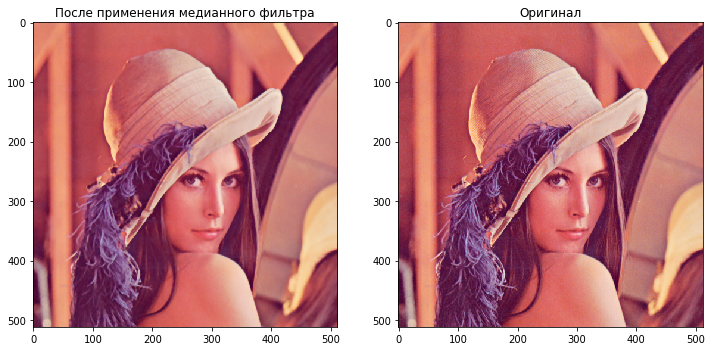

In [905]:
plt.figure(2, figsize=(12, 8))
plt.subplot(121)
plt.imshow(res[...,::-1])
plt.title('После применения медианного фильтра')
plt.subplot(122)
plt.imshow(img[...,::-1])
plt.title('Оригинал');

## Добавляем случайный шум на изображение

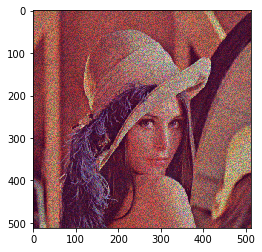

In [922]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float)) # np.random.uniform - равномерный шум
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

In [923]:
from ipywidgets import interact

def median_filter_show(ksize = 3):
    filtered = median_filter_color(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (1, 20, 1));

interactive(children=(IntSlider(value=3, description='ksize', max=20, min=1), Output()), _dom_classes=('widget…